# Weekly Leader Board Score Analyzation  

## Latest News  
|Date|Discription|Note|
|:---:|:---:|:---:|
|20200608|2020 年 6 月 1 日から 6 月 8 日までのデータを反映させた。|新ルール下でのスコア閾値は概ね予想通り。<br>今回は上位は比較的ロースコアの接戦だった。|
|20200602|2020 年 5 月 25 日から 6 月 1 日までのデータを反映させた。<br>また、Leader Board のルール変更に伴う分析も実施した。|過去 2 回と比較してハイレベルだった。|  

## 2020 年 6 月 2 日にアナウンスされた Leader Board の新ルールについて

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.precision = 2

In [2]:
# データの読み込み
data_sources = {"20_0511_0518": "./data/weekly_leader_board/2020_0511_0518.csv",
                "20_0518_0525": "./data/weekly_leader_board/2020_0518_0525.csv",
                "20_0525_0601": "./data/weekly_leader_board/2020_0525_0601.csv",
                "20_0601_0608": "./data/weekly_leader_board/2020_0601_0608.csv"}


df = pd.DataFrame(columns=("RANK", "BATTLES", "WIN", "LOSE", "DRAW", "SCORE"))

for k, v in data_sources.items():
    tmp = pd.read_csv(v, encoding="utf8", dtype="float")
    
    # New Rule (NR) でのランク
    tmp = tmp.sort_values(by=["SCORE", "WIN", "LOSE", "DRAW"], ascending=[False, False, True, True])
    tmp["NR_RANK"] = tmp.reset_index().index+1

    tmp["SOURCE"] = k
    c = len(tmp)
    print(f"Source: {k}, Count: {c}")    
    
    df = pd.concat([df, tmp], ignore_index=True)

    
df[["RANK", "BATTLES", "WIN", "LOSE", "DRAW", "SCORE" ,"NR_RANK"]] = \
        df[["RANK", "BATTLES", "WIN", "LOSE", "DRAW", "SCORE" ,"NR_RANK"]].astype(int)
df.dtypes

Source: 20_0511_0518, Count: 184
Source: 20_0518_0525, Count: 207
Source: 20_0525_0601, Count: 180
Source: 20_0601_0608, Count: 300


RANK        int32
BATTLES     int32
WIN         int32
LOSE        int32
DRAW        int32
SCORE       int32
NR_RANK     int32
SOURCE     object
dtype: object

In [3]:
def get_prize_zone(rank):
    if rank == 1:
        return "0_1st"    
    elif rank <= 5:
        return "1_<= 5th"
    elif rank <= 10:
        return "2_<= 10th"
    elif rank <= 50:
        return "3_<= 50th"
    elif rank <= 100:
        return "4_<= 100th"
    else:
        return "5_out of zone"
    
df["P_ZONE"] = df["RANK"].apply(get_prize_zone)
df["NR_P_ZONE"] = df["NR_RANK"].apply(get_prize_zone)

In [4]:
df[df["RANK"]<=100].describe()

,RANK,BATTLES,WIN,LOSE,DRAW,SCORE,NR_RANK
count,635.00,635.00,635.00,635.00,635.00,635.00,635.00
mean,60.68,111.32,72.15,36.00,3.17,311.66,83.83
std,29.59,73.41,48.05,30.32,4.84,87.44,51.33
min,1.00,16.00,15.00,1.00,0.00,236.00,1.00
25%,36.50,59.00,39.00,15.00,1.00,256.00,40.00
50%,66.00,90.00,60.00,27.00,2.00,284.00,80.00
75%,88.00,148.00,88.00,50.00,4.00,334.50,126.00
max,100.00,618.00,349.00,264.00,69.00,850.00,192.00


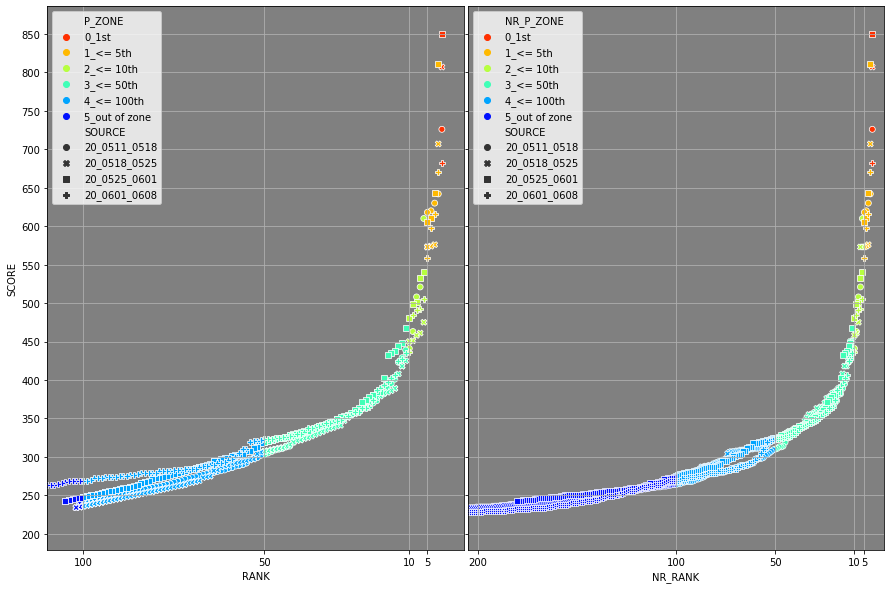

In [5]:
common_settings = {"facecolor": "gray",}
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,10), 
                       subplot_kw=common_settings)
fig.subplots_adjust(wspace=0.01)   

sns.scatterplot("RANK", "SCORE", hue="P_ZONE", palette="jet_r", 
                style="SOURCE", ax=ax.flatten()[0], data=df)
ax.flatten()[0].grid()
ax.flatten()[0].set_xlim(110, -5)
ax.flatten()[0].set_xticks([100, 50, 10, 5])
ax.flatten()[0].set_yticks(list(range(200, 950, 50)))

sns.scatterplot("NR_RANK", "SCORE", hue="NR_P_ZONE", palette="jet_r", 
                style="SOURCE", ax=ax.flatten()[1], data=df)
ax.flatten()[1].grid()
ax.flatten()[1].set_xlim(205, -5)
ax.flatten()[1].set_xticks([200, 100, 50, 10, 5])

plt.show()

上左図は直近 3 週分の Weekly Leader Board の 100 位圏内のランキングとスコアをプロットしたものです。  

同じデータに対して、本日 6/2 から適用された新ルール (New Rule: NR) が仮に適用されていた場合は上右図ようになります。  
概ね旧ルールの 74 位 (スコアで 269 程度) が新ルールでは 100 位にランクインするような予測です。  

In [6]:
d = dict()
for s in df["SOURCE"].unique():
    d[s] = df[df["SOURCE"]==s]

IndexError: index 3 is out of bounds for axis 0 with size 3

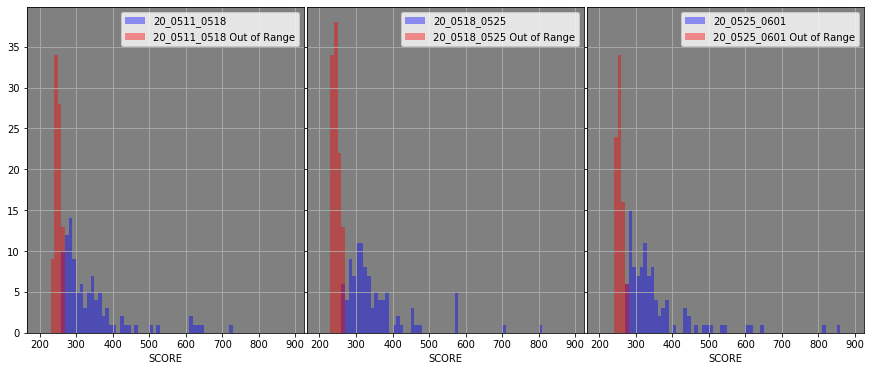

In [7]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15,6), 
                       subplot_kw=common_settings)
fig.subplots_adjust(wspace=0.01)   

i = 0
for k, v in d.items():
    sns.distplot(v[v["NR_P_ZONE"]!="5_out of zone"]["SCORE"], color="b",ax=ax[i], label=k, kde=False, bins=range(200, 900, 10))
    sns.distplot(v[v["NR_P_ZONE"]=="5_out of zone"]["SCORE"], color="r", ax=ax[i], label=k+" Out of Range", kde=False, bins=range(200, 900, 10))
#     sns.distplot(v["SCORE"], ax=ax[i], kde=False, bins=range(200, 900, 5))
    ax[i].grid()
    ax[i].legend()
    i += 1
    
plt.show()

上図は過去 3 週分の週ごとのスコアの分布を表すヒストグラムです。  
赤の部分が新ルールで 100 位圏外に脱落するであろう階級になります。  

In [8]:
df_100 = df[df["RANK"]==100]
df_100

,RANK,BATTLES,WIN,LOSE,DRAW,SCORE,NR_RANK,SOURCE,P_ZONE,NR_P_ZONE
175,100,165,92,68,5,239,176,20_0511_0518,4_<= 100th,5_out of zone
176,100,150,87,60,3,239,177,20_0511_0518,4_<= 100th,5_out of zone
177,100,130,68,60,2,239,178,20_0511_0518,4_<= 100th,5_out of zone
178,100,83,46,33,4,239,179,20_0511_0518,4_<= 100th,5_out of zone
179,100,42,26,15,1,239,180,20_0511_0518,4_<= 100th,5_out of zone
372,100,168,90,74,4,236,189,20_0518_0525,4_<= 100th,5_out of zone
373,100,120,61,58,1,236,190,20_0518_0525,4_<= 100th,5_out of zone
374,100,48,31,14,3,236,191,20_0518_0525,4_<= 100th,5_out of zone
375,100,44,28,15,1,236,192,20_0518_0525,4_<= 100th,5_out of zone
549,100,179,95,82,2,248,159,20_0525_0601,4_<= 100th,5_out of zone


In [9]:
df_100["SCORE"].mean()

243.2

これまでは 100 位の目安のスコアは 240 前後でしたが…

In [10]:
df_nr_100 = df[df["NR_RANK"]==100]
df_nr_100

,RANK,BATTLES,WIN,LOSE,DRAW,SCORE,NR_RANK,SOURCE,P_ZONE,NR_P_ZONE
99,77,131,80,45,6,264,100,20_0511_0518,4_<= 100th,4_<= 100th
283,70,101,63,37,1,267,100,20_0518_0525,4_<= 100th,4_<= 100th
490,77,73,41,28,4,275,100,20_0525_0601,4_<= 100th,4_<= 100th
670,100,27,24,3,0,269,100,20_0601_0608,4_<= 100th,4_<= 100th


In [11]:
df_nr_100["SCORE"].mean()

268.75

新ルールで 100 位に入るには 270 くらい必要になりそうです💦

In [12]:
pd.pivot_table(df, index="P_ZONE", columns="SOURCE", values="SCORE", aggfunc=["mean", "max", "min"], margins=True)

mean                                                 \
SOURCE        20_0511_0518 20_0518_0525 20_0525_0601 20_0601_0608     All   
P_ZONE                                                                      
0_1st               726.00       807.00       850.00       682.00  766.25   
1_<= 5th            627.50       596.00       667.50       610.75  622.17   
2_<= 10th           508.60       459.00       510.80       481.80  490.05   
3_<= 50th           350.23       341.82       357.40       356.02  350.60   
4_<= 100th          261.58       256.16       271.69       285.96  265.64   
5_out of zone       238.00       234.53       244.82       232.11  233.28   
All                 299.46       296.83       310.66       268.32  290.42   

                       max                                              \
SOURCE        20_0511_0518 20_0518_0525 20_0525_0601 20_0601_0608  All   
P_ZONE                                                                   
0_1st                  726          807          850          682  850   
1_<= 5th               642          707          811          671  811   
2_<= 10th              610          475          541          505  610   
3_<= 50th              439          425          468          435  468   
4_<= 100th             302          306          318          322  322   
5_out of zone          238          235          247          269  269   
All                    726          807          850          682  850   

                       min                                              
SOURCE        20_0511_0518 20_0518_0525 20_0525_0601 20_0601_0608  All  
P_ZONE                                                                  
0_1st                  726          807          850          682  682  
1_<= 5th               618          573          605          559  559  
2_<= 10th              441          450          480          437  437  
3_<= 50th              303          307          319          323  303  
4_<= 100th             239          236          248          269  236  
5_out of zone          238          234          242          215  215  
All                    238          234          242          215  215

In [13]:
pd.pivot_table(df, index="NR_P_ZONE", columns="SOURCE", values="SCORE", aggfunc=["mean", "max", "min"], margins=True)

mean                                                 \
SOURCE        20_0511_0518 20_0518_0525 20_0525_0601 20_0601_0608     All   
NR_P_ZONE                                                                   
0_1st               726.00       807.00       850.00       682.00  766.25   
1_<= 5th            627.50       607.50       667.50       610.75  628.31   
2_<= 10th           508.60       508.00       510.80       481.80  502.30   
3_<= 50th           354.65       363.93       364.65       356.02  359.81   
4_<= 100th          282.76       296.00       297.46       285.96  290.55   
5_out of zone       249.96       245.89       254.81       232.11  242.28   
All                 299.46       296.83       310.66       268.32  290.42   

                       max                                              \
SOURCE        20_0511_0518 20_0518_0525 20_0525_0601 20_0601_0608  All   
NR_P_ZONE                                                                
0_1st                  726          807          850          682  850   
1_<= 5th               642          707          811          671  811   
2_<= 10th              610          573          541          505  610   
3_<= 50th              439          451          468          435  468   
4_<= 100th             309          322          324          322  324   
5_out of zone          264          267          274          269  274   
All                    726          807          850          682  850   

                       min                                              
SOURCE        20_0511_0518 20_0518_0525 20_0525_0601 20_0601_0608  All  
NR_P_ZONE                                                               
0_1st                  726          807          850          682  682  
1_<= 5th               618          573          605          559  559  
2_<= 10th              441          458          480          437  437  
3_<= 50th              310          322          325          323  310  
4_<= 100th             264          267          275          269  264  
5_out of zone          238          234          242          215  215  
All                    238          234          242          215  215

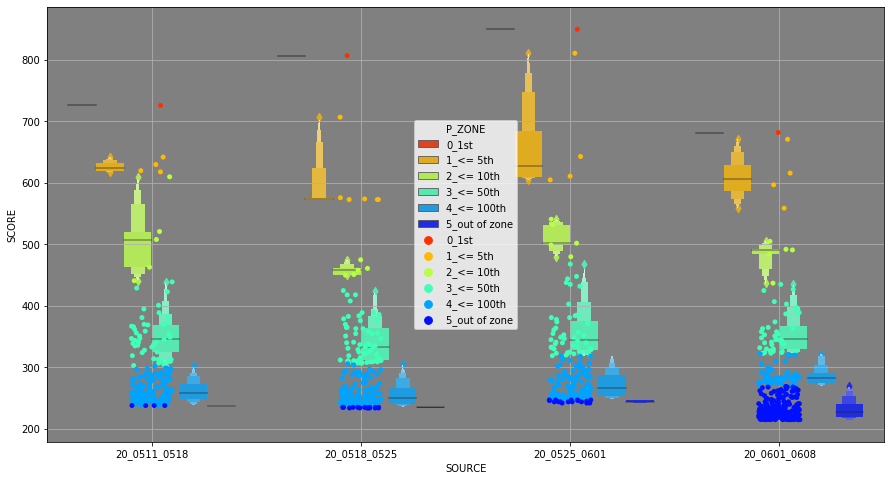

In [20]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
b = sns.boxenplot("SOURCE", "SCORE", hue="P_ZONE", palette="jet_r", data=df, ax=ax)
sns.stripplot("SOURCE", "SCORE", hue="P_ZONE", palette="jet_r", data=df, ax=ax)
ax.grid(); ax.set_facecolor("gray")
plt.show()

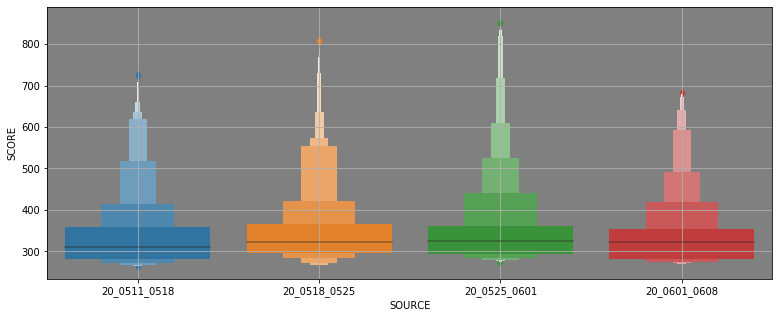

In [22]:
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1, 1, 1)
df_u100 = df[df["NR_RANK"]<=100]
sns.boxenplot("SOURCE", "SCORE", data=df_u100, ax=ax)
ax.set_facecolor("gray")
ax.grid()
plt.show()

ちなみに前週 (2020 年 5 月 25 日から同年 6 月 1 日まで) は、それ以前と比較してハイレベルな争いとなっていたようです。  
上図のように、前 2 週と比べて全体的にハイスコアでした。  

## スコア要因の分析  

わかっていること

- スコア 200 までは 1 勝あたり +20 程度のスコアのゲイン、逆に 1 敗あたり -20 程の減少となる。  
- 引き分けでスコア -1 となることを確認。  
- スコア 200 以降は 1 つの勝ち/負けで ±6 程度に変動幅は減少する。  
- スコアは負にならない。  

In [16]:
df["DIFF_W_L"] = df["WIN"]-df["LOSE"]  # 勝敗の差
df["WIN_RATE"] = df["WIN"]/df["BATTLES"]  # 勝率

In [17]:
# 相関係数行列の表示  
df.corr()

,RANK,BATTLES,WIN,LOSE,DRAW,SCORE,NR_RANK,DIFF_W_L,WIN_RATE
RANK,1.00,-0.14,-0.26,0.08,-0.08,-0.65,0.93,-0.45,-0.43
BATTLES,-0.14,1.00,0.95,0.89,0.37,0.30,-0.16,0.51,-0.29
WIN,-0.26,0.95,1.00,0.72,0.31,0.54,-0.31,0.74,-0.06
LOSE,0.08,0.89,0.72,1.00,0.27,-0.11,0.09,0.07,-0.57
DRAW,-0.08,0.37,0.31,0.27,1.00,0.08,-0.08,0.19,-0.25
SCORE,-0.65,0.30,0.54,-0.11,0.08,1.00,-0.74,0.88,0.60
NR_RANK,0.93,-0.16,-0.31,0.09,-0.08,-0.74,1.00,-0.53,-0.50
DIFF_W_L,-0.45,0.51,0.74,0.07,0.19,0.88,-0.53,1.00,0.48
WIN_RATE,-0.43,-0.29,-0.06,-0.57,-0.25,0.60,-0.50,0.48,1.00


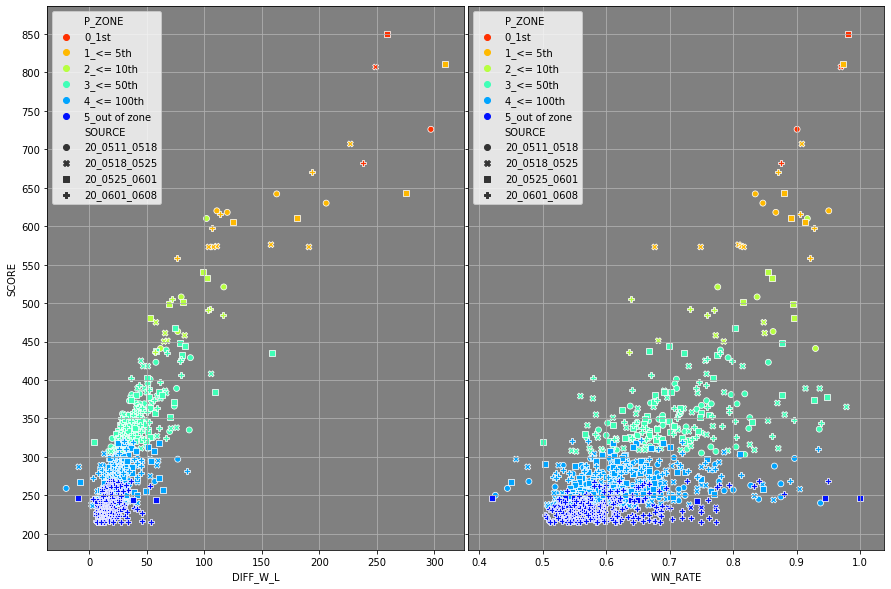

In [18]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15,10), 
                       subplot_kw=common_settings)
fig.subplots_adjust(wspace=0.01)   

sns.scatterplot("DIFF_W_L", "SCORE", hue="P_ZONE", palette="jet_r", 
                style="SOURCE", ax=ax.flatten()[0], data=df)
ax.flatten()[0].grid()
ax.flatten()[0].set_yticks(list(range(200, 950, 50)))

sns.scatterplot("WIN_RATE", "SCORE", hue="P_ZONE", palette="jet_r", 
                style="SOURCE", ax=ax.flatten()[1], data=df)
ax.flatten()[1].grid()


plt.show()

上図のように、勝率 (右) より、勝敗の差 (左) とスコアとがきれいに相関していることが認められます。  

In [6]:
# これはお遊び。単回帰分析をやってみる。
from sklearn.linear_model import LinearRegression

m = LinearRegression()
x = df[["WIN", "LOSE"]]
y = df[["SCORE"]]

m.fit(x, y)

print(m.intercept_)
print(m.coef_)
print(m.score(x, y))

[244.81380294]
[[ 2.19448819 -2.66359878]]
0.8197716349229792


決定係数 $R^2$ が $0.82$ もある！